Accuracy:  0.753125


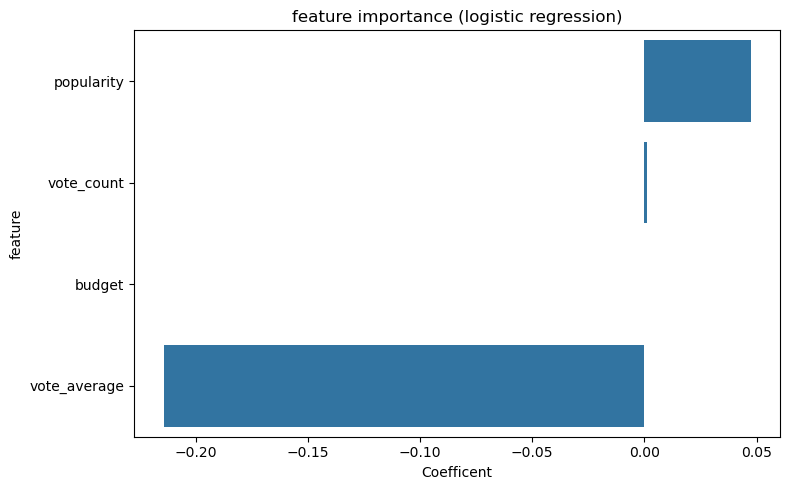

        feature    Coefficent
1    popularity  4.732350e-02
3    vote_count  1.265387e-03
0        budget -2.063896e-08
2  vote_average -2.143369e-01


['logistic_model.pkl']

In [5]:
import pandas as pd
df = pd.read_csv('Downloads\\tmdb_5000_movies.csv')
df.describe()

df.isnull().sum()
df.drop(["tagline", "homepage"], axis = 1, inplace = True)
df = df.dropna(subset=['release_date', 'overview'])

df.isnull().sum()

df['hit'] = df['revenue'] > (2*df['budget'])
df['hit'] = df['hit'].astype(int)  
df[['title', 'budget', 'revenue', 'hit']].head(10)
x= df[['budget', 'popularity', 'vote_average', 'vote_count']]
y = df['hit']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
  x,y,test_size = 0.2, random_state = 42
)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ', accuracy)

#get feature names and their coefficents 
import matplotlib.pyplot as plt
import seaborn as sns
features = x.columns
coefficients = model.coef_[0]
importance_df = pd.DataFrame({
    "feature" : features,
    "Coefficent" : coefficients

})

#sort by importance

importance_df = importance_df.sort_values(by='Coefficent', ascending= False)


plt.figure(figsize=(8,5))
sns.barplot(x='Coefficent', y= 'feature', data=importance_df)
plt.title("feature importance (logistic regression)")
plt.tight_layout()
plt.show() 

print(importance_df)

import joblib
joblib.dump(model, 'logistic_model.pkl')



Random Forest Accuracy: 0.765625


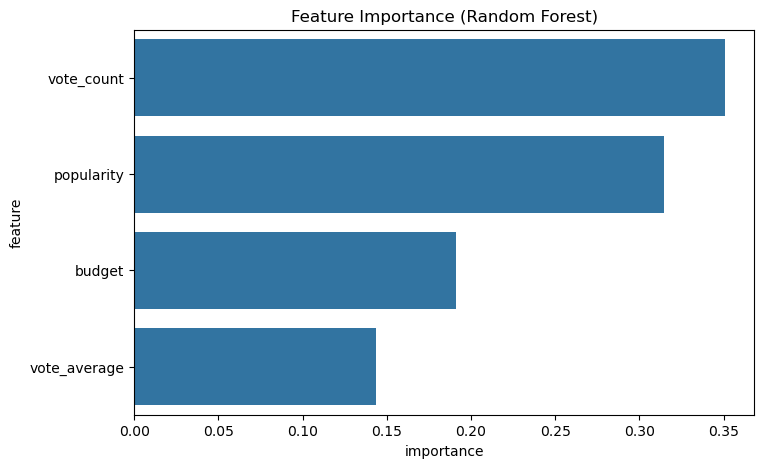

XGBoost 0.7729166666666667


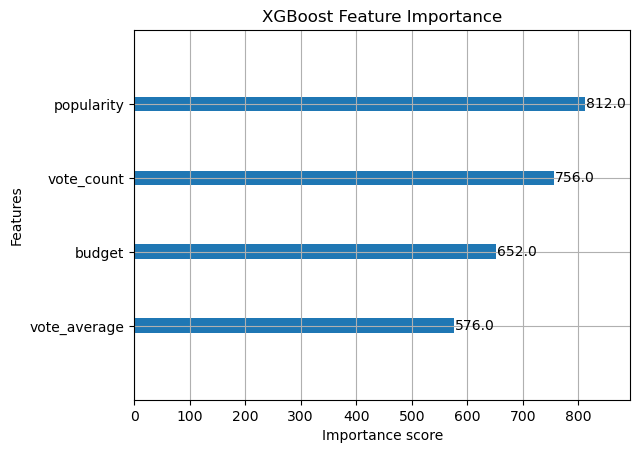

['xgb_model.pkl']

In [4]:
import pandas as pd
df = pd.read_csv('Downloads\\tmdb_5000_movies.csv')
df.describe()

df.isnull().sum()
df.drop(["tagline", "homepage"], axis = 1, inplace = True)
df = df.dropna(subset=['release_date', 'overview'])

df.isnull().sum()

df['hit'] = df['revenue'] > (2*df['budget'])
df['hit'] = df['hit'].astype(int)  
df[['title', 'budget', 'revenue', 'hit']].head(10)
x= df[['budget', 'popularity', 'vote_average', 'vote_count']]
y = df['hit']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
  x,y,test_size = 0.2, random_state = 42
)



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=100, random_state= 42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


import matplotlib.pyplot as plt
import seaborn as sns


importance_rf = pd.DataFrame({
    'feature': x.columns,
    'importance': rf_model.feature_importances_
})

importance_rf = importance_rf.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='importance', y='feature', data=importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()


from  xgboost  import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier( eval_metric="logloss")
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost", accuracy_xgb)

from xgboost import plot_importance
plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()




import joblib
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')



C:\Users\Rania Shoaib
